# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist
from scipy import stats

da = pd.read_csv("..\..\\nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [262]:
# insert your code here
da = da.dropna(subset = ['RIAGENDR','SMQ020','DMDEDUC2','RIDAGEYR','BMXHT','RIDAGEYR','BMXBMI','BPXDI1','BPXDI2'])
da['DMDMARTLx'] = da['DMDMARTL'].replace({1: 'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living with partner', 77:np.nan, 99:np.nan})

da['DMDMARTLm'] = da['DMDMARTL'].replace(to_replace={2,3,4,5,6,77,99}, value="Not married")
da['DMDMARTLm'] = da['DMDMARTLm'].replace({1: 'Married'})
       
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da['DMDEDUC2m'] = da['DMDEDUC2'].replace(to_replace={1,2,3,4,7,9}, value="No college")
da['DMDEDUC2m'] = da['DMDEDUC2m'].replace({5: 'College'})

da['RIAGENDRx'] = da['RIAGENDR'].replace({1: "Male", 2: "Female"})

da['SMQ020x'] = da['SMQ020'].replace({1:'Yes', 2:'No', 7:np.nan, 9:np.nan})

da['agegrp'] = pd.cut(da['RIDAGEYR'],[10, 20, 30, 40, 50, 60, 70, 80])
da['agegrp height'] = pd.cut(da['RIDAGEYR'],[18, 28, 38, 48, 58, 68, 80])

print('Total na values: ',da.isnull().sum().sum(),'\n','Original shape: :',da.shape,'\n')

print('Total na values: ',da.isnull().sum().sum(),'\n','After droping NA shape: :',da.shape,'\n')

ds = da.loc[:,['RIAGENDRx','SMQ020x','SMQ020']]

dsg = ds.groupby(['RIAGENDRx'])['SMQ020x'].agg(
    Sample_size = np.size,
    Smoke_c     = lambda x: np.sum (x == 'Yes'),
    Smoke_p     = lambda x: np.mean(x == 'Yes'),
    )

dsg['SE']      = np.sqrt((dsg['Smoke_p']*(1-dsg['Smoke_p']))/dsg['Sample_size'])
diff_statistic = (dsg.loc['Female','Smoke_p'] - dsg.loc['Male','Smoke_p'])
diff_se        = ((dsg.loc['Female','Sample_size']*dsg.loc['Female','Smoke_p'])+(dsg.loc['Male','Sample_size']*dsg.loc['Male','Smoke_p']))/(dsg.loc['Female','Sample_size']+dsg.loc['Male','Sample_size'])
diff_se        = diff_se * (1-diff_se) * ((1/dsg.loc['Female','Sample_size'])+(1/dsg.loc['Male','Sample_size']))

dsg.loc['Difference', 'Smoke_p'] = diff_statistic
dsg.loc['Difference', 'SE']      = diff_se

diff_test_stat = diff_statistic/np.sqrt(diff_se)
diff_pvalue    = 2*dist.norm.cdf(-np.abs(diff_test_stat))

print (dsg,'\n')
print('Manually calculated: (', diff_test_stat,diff_pvalue,')')
print('SM zprop calculated: ',sm.stats.proportions_ztest(dsg.loc[['Male','Female'],'Smoke_c'],dsg.loc[['Male','Female'],'Sample_size']))
print('SM ttest calculated: ',sm.stats.ttest_ind(ds[ds['RIAGENDRx'] == 'Male'].loc[:,'SMQ020'],ds[ds['RIAGENDRx'] == 'Female'].loc[:,'SMQ020']))


Total na values:  8274 
 Original shape: : (5070, 36) 

Total na values:  8274 
 After droping NA shape: : (5070, 36) 

            Sample_size  Smoke_c   Smoke_p        SE
RIAGENDRx                                           
Female           2622.0    835.0  0.318459  0.009098
Male             2448.0   1301.0  0.531454  0.010086
Difference          NaN      NaN -0.212995  0.000193 

Manually calculated: ( -15.348462441482992 3.6268076293289323e-53 )
SM zprop calculated:  (15.348462441482992, 3.6268076293289323e-53)
SM ttest calculated:  (-13.527349554281756, 5.508324716079361e-41, 5068.0)


__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

Based on our estimated difference in sample proportions, we have enough evidence that there is a difference between the women and men population mean that smokes of all ethnicities. Our p-value is almost null which is lower than the significance value set at .05. Thus we can reject the null

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [263]:
# insert your code here
dsg['lcb'] = dsg['Smoke_c']-(1.96*dsg['SE'])
dsg['ucb'] = dsg['Smoke_c']+(1.96*dsg['SE'])
dsg

,Sample_size,Smoke_c,Smoke_p,SE,lcb,ucb
RIAGENDRx,,,,,,
Female,2622.0,835.0,0.318459,0.009098,834.982167,835.017833
Male,2448.0,1301.0,0.531454,0.010086,1300.980232,1301.019768
Difference,NaN,NaN,-0.212995,0.000193,NaN,NaN


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The confidence interval reinforces the idea that the mean difference is somewhere between -.216 and -.215 and that interval does not contain zero

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [264]:
# insert your code here
da.head
dh  = da.loc[:,['DMDEDUC2m','BMXHT']]
dcm = da.loc[:,['DMDEDUC2m','BMXHT']]
dcm['BMXHT'] = dcm['BMXHT']/2.54

dhg = da.groupby(['DMDEDUC2m'])['BMXHT'].agg([np.mean,np.std,'size'])
dhg['se'] = dhg['std']/np.sqrt(dhg['size'])
dhg.loc['Difference','mean'] = dhg.loc['College','mean'] - dhg.loc['No college','mean']
dhg.loc['Difference','se'] = np.sqrt( ( (((dhg.loc['College','size']-1)*(dhg.loc['College','std']**2)) + ((dhg.loc['No college','size']-1)*(dhg.loc['No college','std']**2))) / (dhg.loc['No college','size'] +dhg.loc['College','size']+2) )              
                                       *((1/dhg.loc['College','size']) + (1/dhg.loc['No college','size'])) ) 
print(dhg,'\n')

zvalue = dhg.loc['Difference','mean'] / dhg.loc['Difference','se']
pvalue = 2*dist.norm.cdf(-np.abs(zvalue))
print('Manually calculated: (',zvalue, pvalue,')')

print('SM Test in inches', sm.stats.ttest_ind(dh[dh['DMDEDUC2m'] == 'College']['BMXHT'],dh[dh['DMDEDUC2m'] == 'No college']['BMXHT']))
print('SM Test in cm    ', sm.stats.ttest_ind(dcm[dcm['DMDEDUC2m'] == 'College']['BMXHT'],dcm[dcm['DMDEDUC2m'] == 'No college']['BMXHT']))

                  mean        std    size        se
DMDEDUC2m                                          
College     167.937749   9.730158  1253.0  0.274881
No college  165.530207  10.161915  3817.0  0.164481
Difference    2.407542        NaN     NaN  0.327313 

Manually calculated: ( 7.355469547250343 1.9025712930913913e-13 )
SM Test in inches (7.352568553428918, 2.2554094229586733e-13, 5068.0)
SM Test in cm     (7.3525685534289975, 2.2554094229573437e-13, 5068.0)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

Based on our estimated difference in sample means, we can support that there is a significant difference between the college graduates and non-college graduates heights. Our p-value is almost zero which is less the .05 significance level set. Thus we can reject the null

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

There is no difference in the results as the numbers just were scaled down by 2.54

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [265]:
# insert your code here
da.head
dbmi = da[(da['RIAGENDRx'] == 'Male') & (da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 60)].loc[:,['RIDAGEYR','BMXBMI','agegrp']]
gbmi = dbmi.groupby('agegrp')['BMXBMI'].agg(
                                        Sample_size = np.size,
                                        Sample_mean = np.mean,
                                        Sample_std  = np.std)
print(gbmi.dropna(),'\n')

n_diff_ztest, n_diff_pvalue = sm.stats.ztest(dbmi[(dbmi['RIDAGEYR'] >= 30) & (dbmi['RIDAGEYR'] <= 40)]['BMXBMI'],dbmi[(dbmi['RIDAGEYR'] >= 50) & (dbmi['RIDAGEYR'] <= 60)]['BMXBMI'])
l_diff_ztest, l_diff_pvalue = sm.stats.ztest(np.log(dbmi[(dbmi['RIDAGEYR'] >= 30) & (dbmi['RIDAGEYR'] <= 40)]['BMXBMI']),np.log(dbmi[(dbmi['RIDAGEYR'] >= 50) & (dbmi['RIDAGEYR'] <= 60)]['BMXBMI']))
print('Natural numbers: ',n_diff_ztest, n_diff_pvalue)
print('Log numbers    : ',l_diff_ztest, l_diff_pvalue)

          Sample_size  Sample_mean  Sample_std
agegrp                                        
(20, 30]         34.0    29.452941    6.977767
(30, 40]        429.0    29.586946    6.558309
(40, 50]        378.0    29.694180    6.379166
(50, 60]        426.0    29.305164    5.906684 

Natural numbers:  0.6679253938325175 0.5041812168674731
Log numbers    :  0.4867314285962525 0.6264486698816021


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

Based on our estimated difference in sample means, we cannot support that there is a significant difference between the mean BMI of these age bands given the p-value which is greater than the .05 significance level defined. Thus we cannot reject the null.
The ztest statistic and the p-value for the mean difference of log BMI values is only the log transformation of the ztest statistic and the p-value of the natural numbers.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

            Sample_size  Mean_BMXBMI  Var_BMXBMI  Std_BMXBMI  SE_BMXBMI
DMDEDUC2m                                                              
College           151.0    27.766225   53.059452    7.284192   0.592779
No college        329.0    31.294833   68.368967    8.268553   0.455860


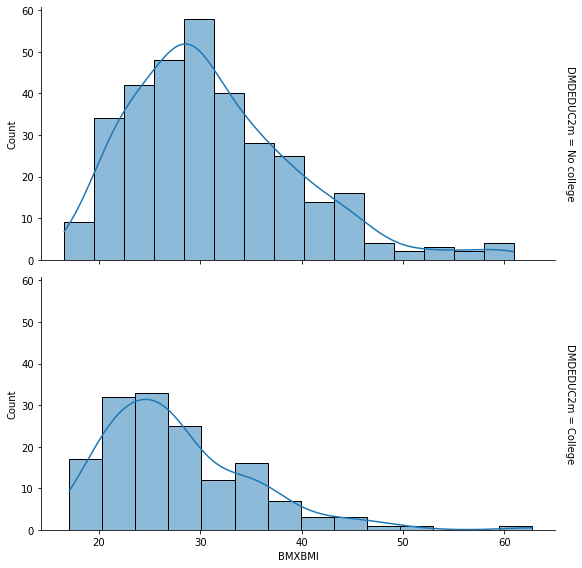

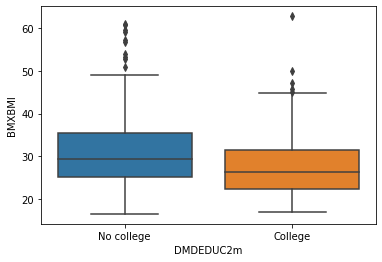

Se pooled  : 0.7836863550833565 
Se unpooled: 0.8383162852493641
Pooled   ttest & pvalue & df  : -4.502576366548435 8.445039195299966e-06 478.0
Unpooled ttest & pvalue & df  : -4.718690966807975 3.5215445376034735e-06 327.49856443075817


In [279]:
# insert your code here
dbmic = da[(da['RIAGENDRx'] == 'Female') & (da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)].loc[:,['DMDEDUC2m','BMXBMI','RIDAGEYR','agegrp']]
gbmic = dbmic.groupby('DMDEDUC2m')['BMXBMI'].agg(
              Sample_size = np.size,
              Mean_BMXBMI  = np.mean,
              Var_BMXBMI   = np.var,
              Std_BMXBMI    = np.std)
gbmic['SE_BMXBMI'] = gbmic['Std_BMXBMI'] / np.sqrt(gbmic['Sample_size'])
print(gbmic)

g = sns.FacetGrid(dbmic, row = 'DMDEDUC2m',margin_titles=True, height = 4, aspect = 2)
g.map(sns.histplot,'BMXBMI', kde = True)
g.set_axis_labels("BMXBMI", "Count")
plt.show()
sns.boxplot(x=dbmic['DMDEDUC2m'],y=dbmic['BMXBMI'])
plt.show()

se_unpooled = np.sqrt(gbmic.at['College','SE_BMXBMI']**2+gbmic.at['College','SE_BMXBMI']**2)
std_pooled  = np.sqrt((((gbmic.at['College','Sample_size']-1)*(gbmic.at['College','Std_BMXBMI']**2))+((gbmic.at['No college','Sample_size']-1)*(gbmic.at['No college','Std_BMXBMI']**2)))/(gbmic.at['No college','Sample_size']+gbmic.at['College','Sample_size']-2))
se_pooled   = std_pooled *np.sqrt((1/gbmic.at['No college','Sample_size'])+(1/gbmic.at['College','Sample_size']))
print("Se pooled  :", se_pooled,"\nSe unpooled:",se_unpooled)

ttest_p, pvalue_p, df_p = sm.stats.ttest_ind(dbmic[dbmic['DMDEDUC2m'] == 'College']['BMXBMI'],dbmic[dbmic['DMDEDUC2m'] == 'No college']['BMXBMI'])
ttest_u, pvalue_u, df_u = sm.stats.ttest_ind(dbmic[dbmic['DMDEDUC2m'] == 'College']['BMXBMI'],dbmic[dbmic['DMDEDUC2m'] == 'No college']['BMXBMI'], usevar='unequal')
print('Pooled   ttest & pvalue & df  :',ttest_p, pvalue_p,df_p)
print('Unpooled ttest & pvalue & df  :',ttest_u, pvalue_u,df_u)


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

Based on our estimated difference in sample means, we can support that there is a significant difference between the college graduates and non-college graduates BMI. Our p-value is almost zero which is less the .05 significance level set. The results obtained by using a pooled approach is similar to the unpooled approach. Both the t-statistic and the p-value in both cases is almost the same number. Thus we can reject the null

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [284]:
# insert your code here

print(da.columns)
dd = da.loc[:,['BPXSY1','BPXSY2']]
dd['BPXSY1_diff'] = dd['BPXSY2']- dd['BPXSY1']
print(dd.describe(),'\n')

ztest_pd, pvalue_pd = sm.stats.ztest(dd['BPXSY1_diff'],value=0,alternative='two-sided')

print('Paired data hypothesis test - ztest & pvalue  :',ztest_pd, pvalue_pd)
print('Confidence interval:',sm.stats.zconfint(dd['BPXSY1_diff'],value=0, alpha=0.05, alternative='two-sided'))

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDMARTLx', 'DMDMARTLm', 'DMDEDUC2x',
       'DMDEDUC2m', 'RIAGENDRx', 'SMQ020x', 'agegrp', 'agegrp height'],
      dtype='object')
            BPXSY1       BPXSY2  BPXSY1_diff
count  5070.000000  5070.000000  5070.000000
mean    125.634320   124.927416    -0.706903
std      18.500111    18.186791     5.082598
min      84.000000    84.000000   -32.000000
25%     112.000000   112.000000    -4.000000
50%     124.000000   122.000000     0.000000
75%     136.000000   134.000000     2.000000
max     236.000000   238.000000    26.000000 

Paired data hypothesis test - ztest & pvalue  : -9.90326244782245 4.0291256013113764e-23
Confidence interval: (-0.8468072604

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

Based on our estimated mean difference of diastolyc measurements from the same individual, we can support that there is a significant difference between the the first measurement and the second measurement. Our p-value is almost zero which is less than the .05 significance level set. Thus we can reject the null that states that the first measurements have the same mean as the the second measurements of dyastolic blood pressure.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [285]:
# insert your code here
ztest, pvalue = sm.stats.ztest(dd['BPXSY1'],dd['BPXSY2'],value=0,alternative='two-sided')
print('Paired data hypothesis test - ztest & pvalue  :',ztest, pvalue)
print('Confidence interval:',sm.stats.zconfint(dd['BPXSY1'],dd['BPXSY2'],value=0, alpha=0.05, alternative='two-sided'))

Paired data hypothesis test - ztest & pvalue  : 1.940225198545914 0.05235232740332077
Confidence interval: (-0.007191646626893311, 1.4209983527412933)


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

If we assume that the data is from different individuals we have that p-value obtained is much larger than the .05 significance level which indicates that there is not enough evidence to reject the nulls. The confidence interval in this case supports the this data as the zero is part of the interval.